In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [81]:
second = 261
print(f"{second//60} minutes {second%60} seconds")

4 minutes 21 seconds


In [82]:
minutes = 16
seconds = 00
print(f"{minutes*60+seconds} seconds")

960 seconds


In [83]:
!ls ../../../../../mnt/e/Deep\ Learning\ Analysis

NOWOPAM_DAY_Downsampled_Model23  SEANIMALMOVE_DL_MODEL20
SEANIMALMOVE_DL_MODEL		 Segments_DL20


In [84]:
import pandas as pd

# Load CSV predictions.csv
df = pd.read_csv('../../../../../mnt/e/Deep Learning Analysis/NOWOPAM_DAY_Downsampled_Model23/predictions.csv')
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,0,3,Background,0.961187,"[0.9611873626708984, 0.0013549420982599258, 0...."
1,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,3,6,Background,0.874512,"[0.8745121955871582, 0.004975720774382353, 0.0..."
2,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,6,9,Background,0.968779,"[0.9687785506248474, 0.00106759462505579, 0.00..."
3,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,9,12,Background,0.925737,"[0.9257373809814453, 0.0015114949783310294, 0...."
4,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,12,15,Background,0.954906,"[0.9549064636230469, 0.0012735315831378102, 0...."
...,...,...,...,...,...,...,...
86384,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,285,288,Background,0.869339,"[0.8693387508392334, 0.005966715048998594, 0.0..."
86385,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,288,291,Background,0.901609,"[0.9016093611717224, 0.005026545375585556, 0.0..."
86386,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,291,294,Background,0.927801,"[0.9278004765510559, 0.0021506252232939005, 0...."
86387,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,294,297,Background,0.963875,"[0.963874876499176, 0.0008426329586654902, 0.0..."


In [85]:
## Define class mapping
CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    'Fin_FinbackWhale': 3,
    "Grampus_Risso'sDolphin": 4,
    'HarborPorpoise': 5,
    'HumpbackWhale': 6,
    'KillerWhale': 7,
    'Long_FinnedPilotWhale': 8,
    'MinkeWhale': 9,
    'SpermWhale': 10,
    'StripedDolphin': 11
}

CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    "Grampus_Risso'sDolphin": 3,
    'HarborPorpoise': 4,
    'KillerWhale': 5,
    'Long_FinnedPilotWhale': 6,
    'StripedDolphin': 7
}

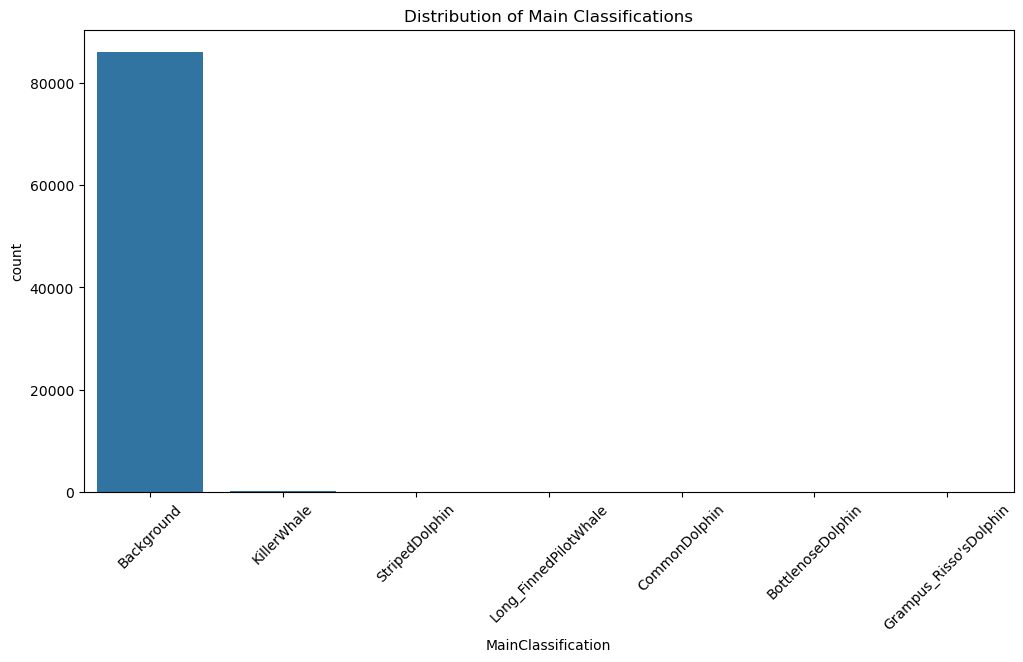

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of main classifications
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MainClassification', order=df['MainClassification'].value_counts().index)
plt.title('Distribution of Main Classifications')
plt.xticks(rotation=45)
plt.show()

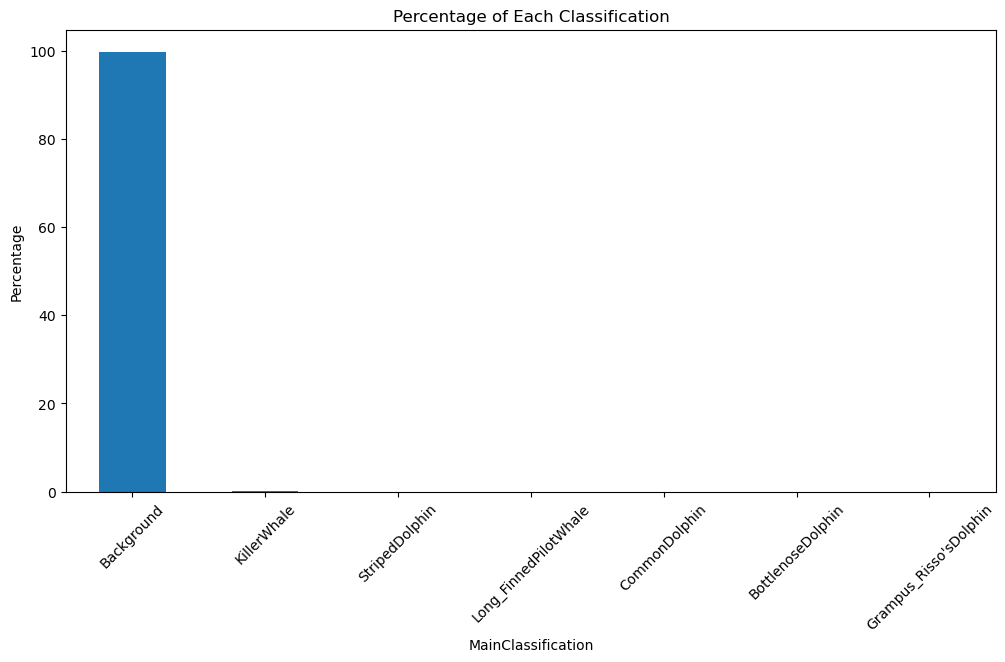

In [87]:
# Calculate the percentage of each classification
classification_counts = df['MainClassification'].value_counts(normalize=True) * 100

# Plot the percentage of each classification
plt.figure(figsize=(12, 6))
classification_counts.plot(kind='bar')
plt.title('Percentage of Each Classification')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

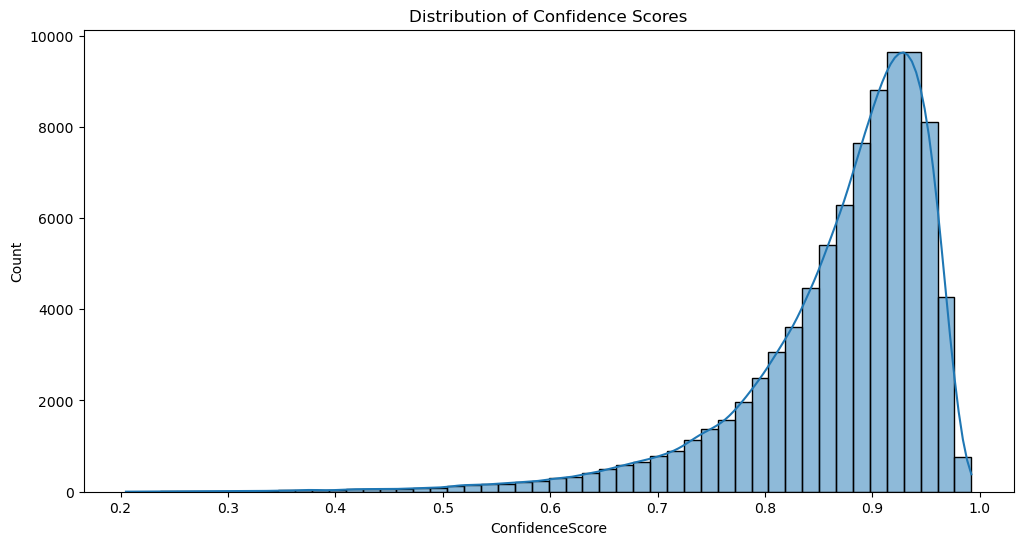

In [88]:
# Plot the distribution of confidence scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ConfidenceScore', bins=50, kde=True)
plt.title('Distribution of Confidence Scores')
plt.show()

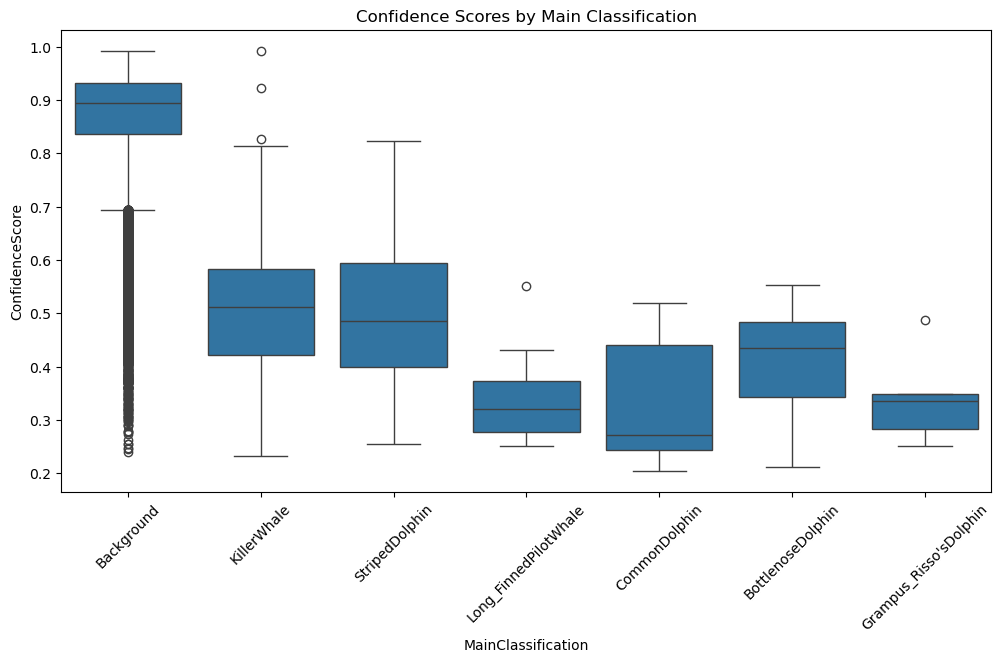

In [89]:
# Plot the confidence scores by main classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MainClassification', y='ConfidenceScore', order=df['MainClassification'].value_counts().index)
plt.title('Confidence Scores by Main Classification')
plt.xticks(rotation=45)
plt.show()

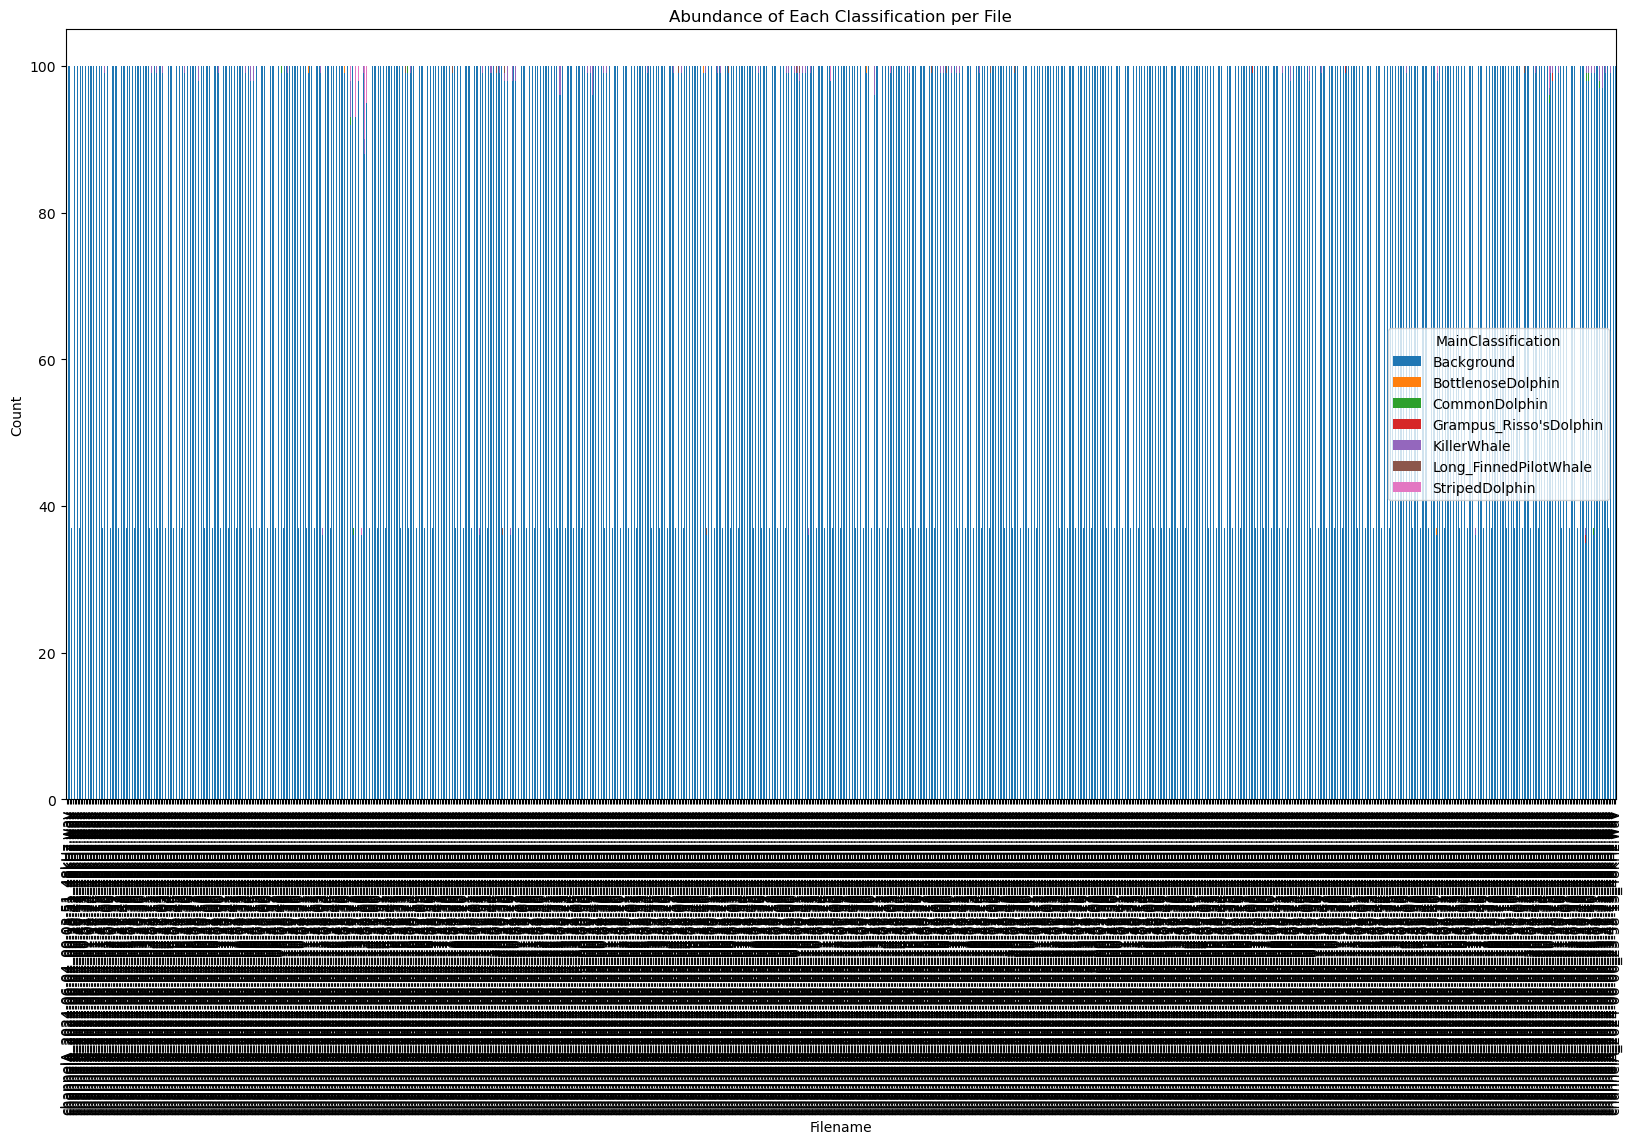

In [90]:
# Calculate the abundance of each classification per file
abundance_per_file = df.groupby(['Filename', 'MainClassification']).size().unstack(fill_value=0)

# Plot the abundance of each classification per file
abundance_per_file.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Abundance of Each Classification per File')
plt.ylabel('Count')
plt.xticks()
plt.show()

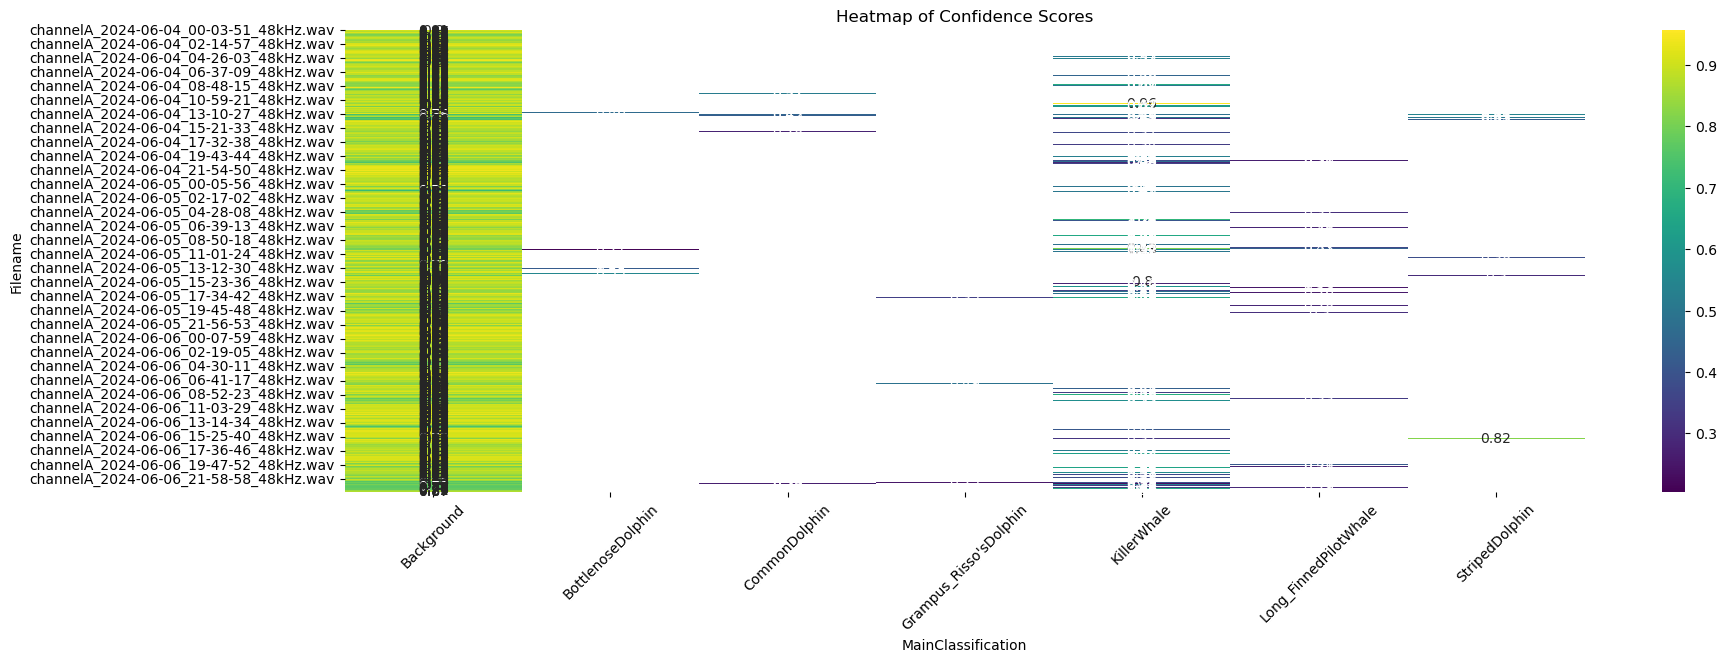

In [91]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Filename', columns='MainClassification', values='ConfidenceScore', aggfunc='mean')

# Plot the heatmap of confidence scores
plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of Confidence Scores')
plt.xticks(rotation=45)
plt.show()

In [92]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,0,3,Background,0.961187,"[0.9611873626708984, 0.0013549420982599258, 0...."
1,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,3,6,Background,0.874512,"[0.8745121955871582, 0.004975720774382353, 0.0..."
2,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,6,9,Background,0.968779,"[0.9687785506248474, 0.00106759462505579, 0.00..."
3,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,9,12,Background,0.925737,"[0.9257373809814453, 0.0015114949783310294, 0...."
4,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-04_00-03-51_48kHz.wav,12,15,Background,0.954906,"[0.9549064636230469, 0.0012735315831378102, 0...."
...,...,...,...,...,...,...,...
86384,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,285,288,Background,0.869339,"[0.8693387508392334, 0.005966715048998594, 0.0..."
86385,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,288,291,Background,0.901609,"[0.9016093611717224, 0.005026545375585556, 0.0..."
86386,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,291,294,Background,0.927801,"[0.9278004765510559, 0.0021506252232939005, 0...."
86387,../../../mnt/e/NOWOPAM DAY_Downsampled/channel...,channelA_2024-06-06_23-58-13_48kHz.wav,294,297,Background,0.963875,"[0.963874876499176, 0.0008426329586654902, 0.0..."


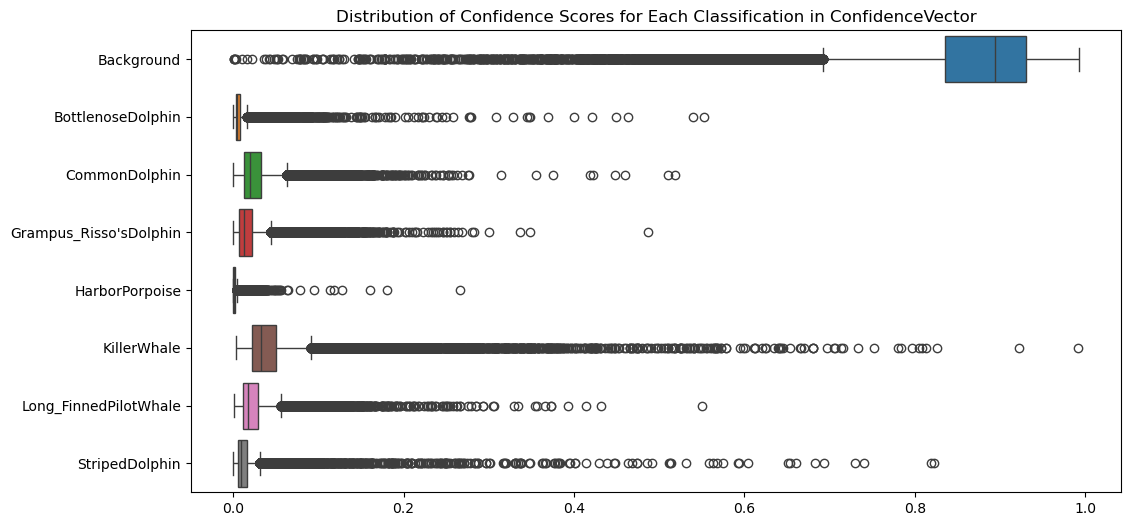

In [93]:
# Check the distribution of the confidence scores for each classification in ConfidenceVector
confidence_vector = df['ConfidenceVector'].apply(eval)
confidence_vector = pd.DataFrame(confidence_vector.tolist(), columns=CLASSES_MAPPING.keys())

plt.figure(figsize=(12, 6))
sns.boxplot(data=confidence_vector, orient='h')
plt.title('Distribution of Confidence Scores for Each Classification in ConfidenceVector')
plt.show()

In [94]:
# Load predictions file
# predictions_file = "predictions.csv"  # Replace with your actual file path
# predictions_df = pd.read_csv(predictions_file)

# Reverse mapping for easy lookup
IDX_TO_CLASSES = {v: k for k, v in CLASSES_MAPPING.items()}

In [95]:
def analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.5):
    results = []

    for _, row in df.iterrows():
        confidence_vector = eval(row['ConfidenceVector'])  # Convert string to list
        main_class_idx = np.argmax(confidence_vector)
        main_class_score = confidence_vector[main_class_idx]

        # Sort classes by confidence
        sorted_classes = sorted(
            enumerate(confidence_vector), key=lambda x: x[1], reverse=True
        )

        # Filter background if necessary
        if ignore_background:
            sorted_classes = [sc for sc in sorted_classes if sc[0] != CLASSES_MAPPING['Background']]

        # Filter by confidence threshold
        sorted_classes = [sc for sc in sorted_classes if sc[1] >= confidence_threshold]

        # Create a summary for this row
        summary = {
            'Filename': row['Filename'],
            'StartSecond': row['StartSecond'],
            'EndSecond': row['EndSecond'],
            'MainClassification': IDX_TO_CLASSES[main_class_idx],
            'MainConfidenceScore': main_class_score,
            'TopClasses': [
                {
                    'Class': IDX_TO_CLASSES[class_idx],
                    'Score': score
                }
                for class_idx, score in sorted_classes[:5]  # Top 5 classifications
            ]
        }
        results.append(summary)

    return results

# Analyze with and without background, using a confidence threshold of 0.5
results_with_background = analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.3)
results_without_background = analyze_confidence_vectors(df, ignore_background=True, confidence_threshold=0.3)

Plotting results with background:


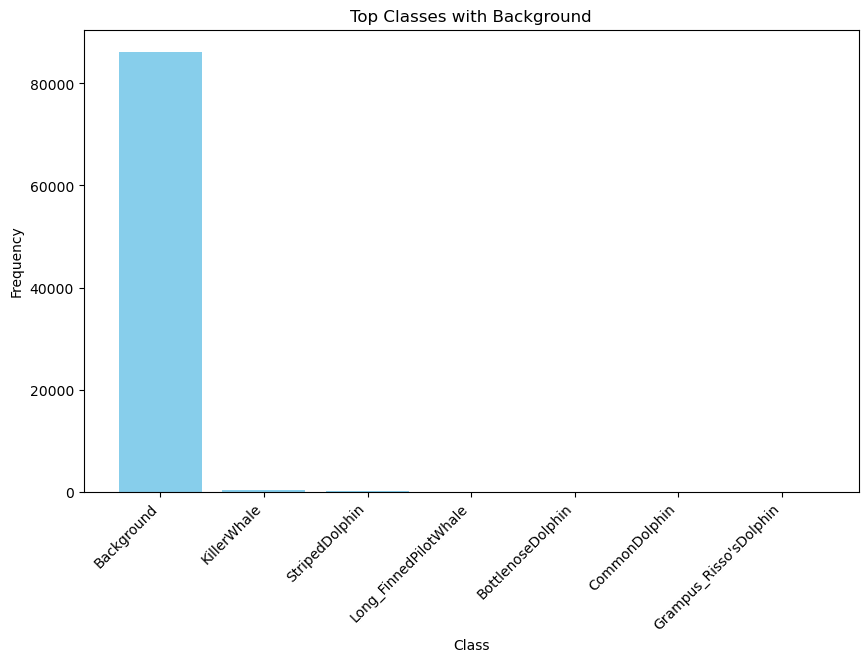


Plotting results without background:


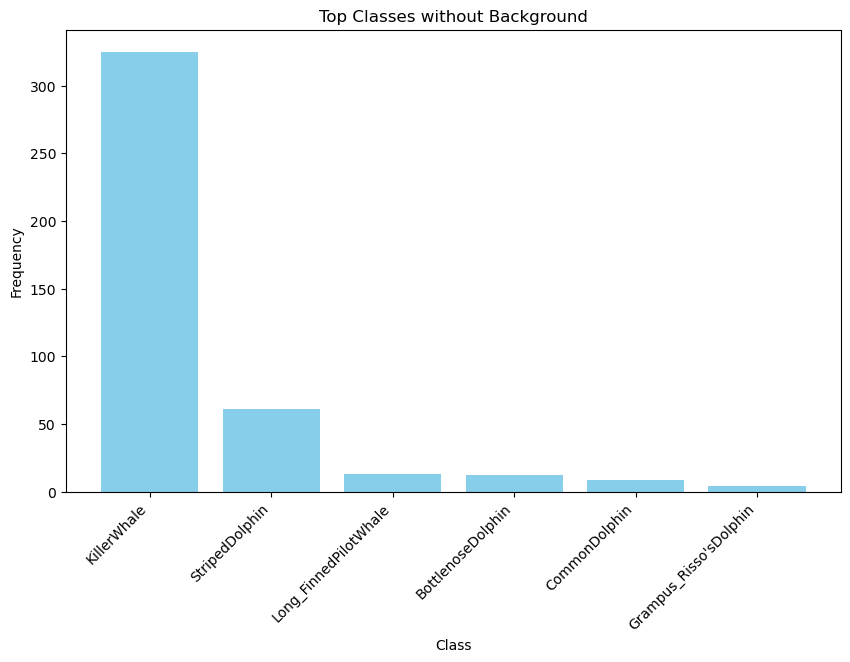

In [96]:
# Visualization function
def plot_top_classes(results, title):
    class_counts = {}

    for result in results:
        for entry in result['TopClasses']:
            class_name = entry['Class']
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Sort by frequency
    sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_counts)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot results
print("Plotting results with background:")
plot_top_classes(results_with_background, "Top Classes with Background")

print("\nPlotting results without background:")
plot_top_classes(results_without_background, "Top Classes without Background")

In [97]:
# save new csv without rows with background
df = df[df['MainClassification'] != 'Background']
df["Path"] = df["Path"].str.split("/mnt/e/").str[1]
df.to_csv('../../../../../mnt/e/Deep Learning Analysis/NOWOPAM_DAY_Downsampled_Model23/predictions_no_background.csv', index=False)

/tmp/ipykernel_1839639/1430016486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Path"] = df["Path"].str.split("/mnt/e/").str[1]


In [98]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
2106,NOWOPAM DAY_Downsampled/channelA_2024-06-04_01...,channelA_2024-06-04_01-48-06_48kHz.wav,63,66,KillerWhale,0.568359,"[0.41651639342308044, 0.0005951551138423383, 0..."
4720,NOWOPAM DAY_Downsampled/channelA_2024-06-04_03...,channelA_2024-06-04_03-59-12_48kHz.wav,39,42,KillerWhale,0.566447,"[0.28282231092453003, 0.003969627898186445, 0...."
5022,NOWOPAM DAY_Downsampled/channelA_2024-06-04_04...,channelA_2024-06-04_04-14-12_48kHz.wav,45,48,KillerWhale,0.510340,"[0.316283255815506, 0.017617404460906982, 0.03..."
5387,NOWOPAM DAY_Downsampled/channelA_2024-06-04_04...,channelA_2024-06-04_04-31-03_48kHz.wav,129,132,KillerWhale,0.525480,"[0.2816283106803894, 0.0487314835190773, 0.027..."
6569,NOWOPAM DAY_Downsampled/channelA_2024-06-04_05...,channelA_2024-06-04_05-31-36_48kHz.wav,42,45,KillerWhale,0.640998,"[0.2124193012714386, 0.04027629271149635, 0.01..."
...,...,...,...,...,...,...,...
85554,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-21-22_48kHz.wav,6,9,KillerWhale,0.563988,"[0.10524842143058777, 0.023314744234085083, 0...."
85582,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-21-22_48kHz.wav,90,93,KillerWhale,0.348022,"[0.3025113046169281, 0.03195066377520561, 0.09..."
85637,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-21-22_48kHz.wav,255,258,KillerWhale,0.490302,"[0.27642950415611267, 0.011335188522934914, 0...."
85775,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-31-22_48kHz.wav,69,72,KillerWhale,0.670108,"[0.1172894835472107, 0.00324572273530066, 0.01..."
